# Loading Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
dataset=pd.read_csv('data.csv')

data=pd.read_csv('data.csv')

In [17]:
dataset.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


# Analysing Data

In [18]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [19]:
data['timestamp'] = pd.to_datetime(data['timestamp'],errors='coerce')

data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%y-%m-%d %H:%M:%S')

data['timestamp'].head()

0   2018-02-28 21:00:00
1   2018-02-28 21:15:00
2   2018-02-28 10:15:00
3   2018-02-28 10:15:00
4   2018-02-28 10:30:00
Name: timestamp, dtype: datetime64[ns]

In [20]:
column_1 = data.iloc[:,0]

db=pd.DataFrame({#"year": column_1.dt.year,
              
                 #"month": column_1.dt.month,
                 "day": column_1.dt.day,
                 "hour": column_1.dt.hour,
                 #"dayofyear": column_1.dt.dayofyear,
                 "week": column_1.dt.week,
                 #"weekofyear": column_1.dt.weekofyear,
                 #"dayofweek": column_1.dt.dayofweek,
                 #"weekday": column_1.dt.weekday,
                 #"quarter": column_1.dt.quarter,
               })

In [66]:
dataset1=dataset.drop('timestamp',axis=1)

data1=pd.concat([db,dataset1],axis=1)

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 11 columns):
day          2068 non-null float64
hour         2068 non-null float64
week         2068 non-null float64
act379       2090 non-null int64
act13        2090 non-null int64
act279       2090 non-null int64
act323       2090 non-null int64
act363       2090 non-null int64
act302       2090 non-null int64
latitude     2090 non-null float64
longitude    2090 non-null float64
dtypes: float64(5), int64(6)
memory usage: 179.7 KB


In [67]:
data1.head()

,day,hour,week,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28.0,21.0,9.0,1,0,0,0,0,0,22.737260,75.875987
1,28.0,21.0,9.0,1,0,0,0,0,0,22.720992,75.876083
2,28.0,10.0,9.0,0,0,1,0,0,0,22.736676,75.883168
3,28.0,10.0,9.0,0,0,1,0,0,0,22.746527,75.887139
4,28.0,10.0,9.0,0,0,1,0,0,0,22.769531,75.888772


In [70]:
data1.dropna(inplace=True)

print(data1.head(3))

    day  hour  week  act379  act13  act279  act323  act363  act302   latitude  \
0  28.0  21.0   9.0       1      0       0       0       0       0  22.737260   
1  28.0  21.0   9.0       1      0       0       0       0       0  22.720992   
2  28.0  10.0   9.0       0      0       1       0       0       0  22.736676   

   longitude  
0  75.875987  
1  75.876083  
2  75.883168  


# Heatmap 

In [73]:
df=pd.read_csv('data-edit.csv')

df = df.rename(columns = {'type':'act'})
df.head(10)

,day,act,frequency
0,1,act379,121
1,1,act13,22
2,1,act279,88
3,1,act323,66
4,1,act363,33
5,1,act302,0
6,3,act379,66
7,3,act13,0
8,3,act279,121
9,3,act323,66


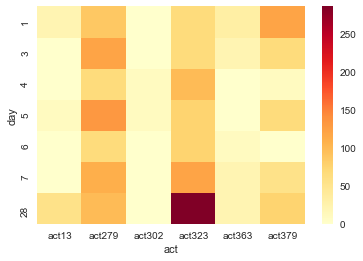

In [74]:
heatmap1_data = pd.pivot_table(df, values='frequency', 
                     index=['day'], 
                     columns="act")
sns.heatmap(heatmap1_data,cmap="YlOrRd")

# Analyzing Most Important Features

In [77]:
X=data1.iloc[:,[0,1,2,9,10]].values

X

array([[ 28.      ,  21.      ,   9.      ,  22.73726 ,  75.875987],
       [ 28.      ,  21.      ,   9.      ,  22.720992,  75.876083],
       [ 28.      ,  10.      ,   9.      ,  22.736676,  75.883168],
       ..., 
       [  3.      ,  12.      ,  27.      ,  22.531931,  75.769126],
       [  3.      ,  10.      ,  27.      ,  22.719569,  75.857726],
       [  3.      ,  23.      ,  27.      ,  22.686437,  76.032055]])

In [78]:
y=data1.iloc[:,[3,4,5,6,7,8]].values

y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ..., 
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

# Creating And Training KNN Model

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

print(X_train)

[[  3.         9.        14.        22.724     75.8621  ]
 [ 28.         1.         9.        22.722247  75.915294]
 [  3.        14.         9.        22.7278    75.8046  ]
 ..., 
 [  1.        16.         9.        22.66215   75.9035  ]
 [ 28.        21.         9.        22.73726   75.875987]
 [ 28.        11.         9.        22.715121  75.856601]]


In [127]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
print("importance of the features:")
print(model.feature_importances_)

importance of the features:
[ 0.04674434  0.28656643  0.11674634  0.28565737  0.26428553]


# Elbow Method For optimum value of K

In [128]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

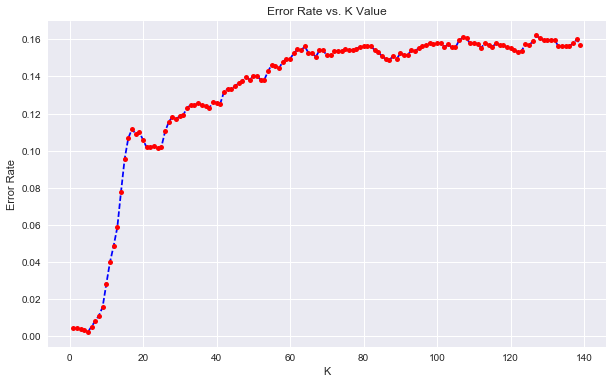

In [129]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [130]:
for i in range(1,15):
    print(error_rate[i])

0.00402576489533
0.00375738056897
0.00322061191626
0.00214707461084
0.00509930220075
0.00805152979066
0.0110037573806
0.0155662909286
0.027911969941
0.0397208803006
0.0485775630703
0.0585077831455
0.0775630703167
0.0955448201825


# KNN Model & Calculating KNN Score

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [132]:
knn.score(X_test,y_test)

0.98872785829307563

In [133]:
knn.score(X_train,y_train)

0.98963372494816859

# Calculating Errors

In [134]:
train_pred=knn.predict(X_train)

print(train_pred)

test_pred=knn.predict(X_test)

print(test_pred)

[[0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 ..., 
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]]
[[0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 ..., 
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]]


In [135]:
from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

train_rmse=mean_squared_error(train_pred,y_train)**0.5

test_rmse=mean_squared_error(test_pred,y_test)**0.5

predicted_data=np.round_(test_pred)

print("Mae: ",metrics.mean_absolute_error(y_test,test_pred))

print("rmse:",np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Mae:  0.00375738056897
rmse: 0.0612974760408


# Ploting Graphs

In [136]:
error_rate = []
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    predicted_data=np.round_(test_pred)

In [137]:
mae=[]
rmse=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_pred=knn.predict(X_train)
    test_pred=knn.predict(X_test)
    train_rmse=mean_squared_error(train_pred,y_train)**0.5
    test_rmse=mean_squared_error(test_pred,y_test)**0.5
    mae.append(metrics.mean_absolute_error(y_test,test_pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

# RMSE vs K Value

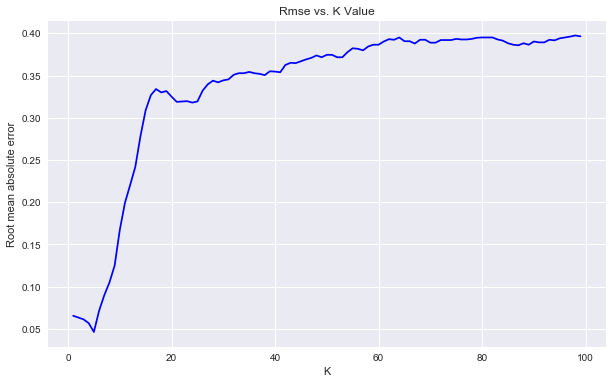

In [138]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),rmse,color='blue')
plt.title('Rmse vs. K Value')
plt.xlabel('K')
plt.ylabel('Root mean absolute error')

# MAE vs K Value

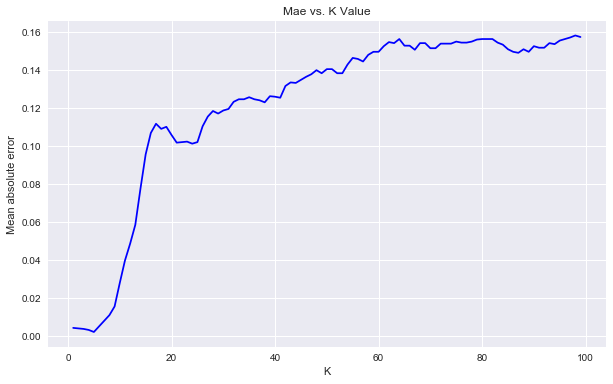

In [139]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),mae,color='blue')
plt.title('Mae vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean absolute error')

# Previous vs Proposed Graphs

In [140]:
mae_org=[0.0056360708534621577,
 0.0056360708534621577,
 0.0056360708534621577,
 0.0060386473429951681,
 0.0056360708534621577,
 0.0060386473429951681,
 0.0056360708534621577,
 0.0060386473429951681,
 0.0056360708534621577,
 0.01328502415458937,
 0.020933977455716585,
 0.035024154589371984,
 0.049114331723027378,
 0.055152979066022546,
 0.063204508856682773,
 0.078904991948470213,
 0.083735909822866342,
 0.097826086956521743,
 0.10829307568438003,
 0.10628019323671499,
 0.10628019323671499,
 0.10144927536231885,
 0.097826086956521729,
 0.097826086956521729,
 0.099838969404186795,
 0.099838969404186795,
 0.099838969404186795,
 0.1030595813204509,
 0.10386473429951693,
 0.10708534621578099,
 0.10789049919484701,
 0.10789049919484701,
 0.11151368760064412,
 0.11513687600644122,
 0.11916264090177135,
 0.12439613526570048,
 0.12560386473429952,
 0.12681159420289856,
 0.12399355877616748,
 0.12278582930756844,
 0.12198067632850242,
 0.12238325281803543,
 0.12278582930756844,
 0.12278582930756844,
 0.12479871175523349,
 0.1280193236714976,
 0.12721417069243157,
 0.12962962962962965,
 0.12962962962962965,
 0.13566827697262482,
 0.13768115942028986,
 0.14170692431561996,
 0.14331723027375201,
 0.14573268921095009,
 0.14452495974235105,
 0.14170692431561996,
 0.14090177133655393,
 0.1461352657004831,
 0.14452495974235105,
 0.14452495974235105,
 0.14412238325281804,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15338164251207728,
 0.15821256038647344,
 0.15579710144927536,
 0.15660225442834139,
 0.15901771336553946,
 0.1602254428341385,
 0.15821256038647344,
 0.15901771336553946,
 0.15821256038647344,
 0.1602254428341385,
 0.16062801932367152,
 0.16223832528180357,
 0.16264090177133655,
 0.15982286634460549,
 0.1610305958132045,
 0.1610305958132045,
 0.16143317230273752,
 0.16143317230273752,
 0.16183574879227053,
 0.16223832528180357,
 0.16223832528180357,
 0.16143317230273754,
 0.16223832528180357,
 0.16223832528180357,
 0.16062801932367152,
 0.15942028985507248,
 0.15942028985507248,
 0.15942028985507248,
 0.15901771336553946,
 0.15901771336553946,
 0.15861513687600645,
 0.15861513687600645,
 0.15861513687600645]

# MAE vs K Value

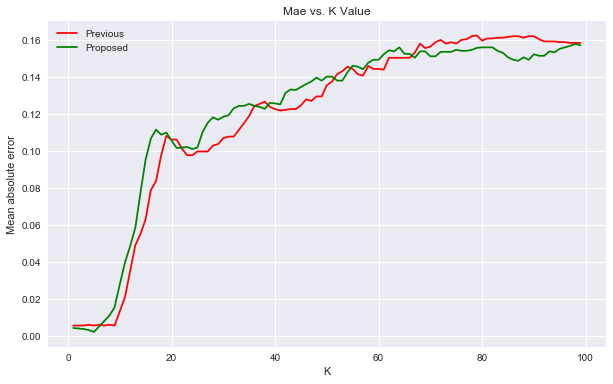

In [141]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),mae_org,color='red',label='Previous')
plt.plot(range(1,100),mae,color='green',label='Proposed')
plt.title('Mae vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean absolute error')
plt.legend()

In [142]:
rmse_org=[0.0750737694102418,
 0.0750737694102418,
 0.0750737694102418,
 0.07770873402002614,
 0.0750737694102418,
 0.0750737694102418,
 0.0750737694102418,
 0.07770873402002614,
 0.0802572353905128,
 0.11526067913468743,
 0.14468578871373852,
 0.18606874562870296,
 0.22161753478239798,
 0.23484671397748477,
 0.2514050692740359,
 0.2809003238667948,
 0.28937157742747704,
 0.31277162108561213,
 0.32907913286074525,
 0.325388409054751,
 0.325388409054751,
 0.3178784341108812,
 0.31212739461154115,
 0.31212739461154115,
 0.31533536578483196,
 0.31533536578483196,
 0.31533536578483196,
 0.32040131839759634,
 0.32165534009244107,
 0.32662328411527547,
 0.3278535079960469,
 0.3278535079960469,
 0.33333333333333337,
 0.3387245186237752,
 0.3457820374040623,
 0.3532686113359542,
 0.3549738599162374,
 0.3566709557735695,
 0.3521271911911482,
 0.35040808967198295,
 0.34925732108075047,
 0.3498331785552014,
 0.35040808967198295,
 0.3544063553807966,
 0.3532686113359542,
 0.35779788103271043,
 0.36059978663216463,
 0.3617144717843463,
 0.3600411499115478,
 0.3661392781640516,
 0.3721374912574059,
 0.37750771819220597,
 0.3796345390672693,
 0.3817495110814814,
 0.38016438515772494,
 0.37643980171551994,
 0.375368847051209,
 0.3796345390672693,
 0.37750771819220597,
 0.378040545159139,
 0.37750771819220597,
 0.3859446866161188,
 0.3859446866161188,
 0.3859446866161188,
 0.3859446866161188,
 0.3859446866161188,
 0.38957840873686167,
 0.3957300272007943,
 0.39522104946321923,
 0.3962383511447048,
 0.3992747047523453,
 0.40078425533405315,
 0.3992747047523453,
 0.39877025135476124,
 0.3967460238079361,
 0.3992747047523453,
 0.39977852161491306,
 0.4017874715601988,
 0.4017874715601988,
 0.3977594252641582,
 0.39977852161491306,
 0.3992747047523453,
 0.39977852161491306,
 0.39977852161491306,
 0.4002817043459999,
 0.40078425533405315,
 0.40078425533405315,
 0.4002817043459999,
 0.40278818910415376,
 0.40278818910415376,
 0.40078425533405315,
 0.40078425533405315,
 0.40078425533405315,
 0.3992747047523453,
 0.3957300272007943,
 0.3957300272007943,
 0.3957300272007943,
 0.3957300272007943,
 0.3957300272007943]

# RMSE vs K Vlaue

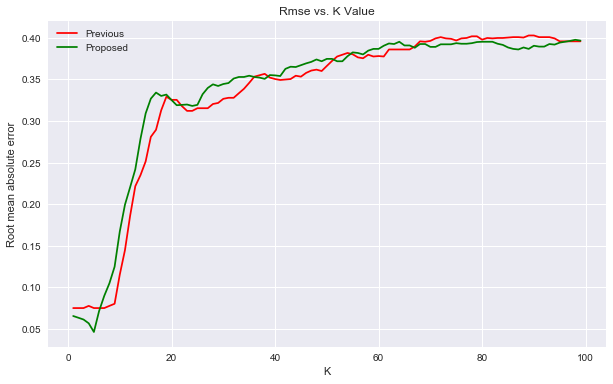

In [143]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),rmse_org,color='red',label='Previous')
plt.plot(range(1,100),rmse,color='green',label='Proposed')
plt.title('Rmse vs. K Value')
plt.xlabel('K')
plt.ylabel('Root mean absolute error')
plt.legend()
plt.show()

In [144]:
error_rate_org=[0.0056360708534621577,
 0.0056360708534621577,
 0.0056360708534621577,
 0.006038647342995169,
 0.0056360708534621577,
 0.006038647342995169,
 0.0056360708534621577,
 0.006038647342995169,
 0.0056360708534621577,
 0.013285024154589372,
 0.020933977455716585,
 0.035024154589371984,
 0.049114331723027378,
 0.055152979066022546,
 0.063204508856682773,
 0.078904991948470213,
 0.083735909822866342,
 0.097826086956521743,
 0.10829307568438003,
 0.10628019323671498,
 0.10628019323671498,
 0.10144927536231885,
 0.097826086956521743,
 0.097826086956521743,
 0.099838969404186795,
 0.099838969404186795,
 0.099838969404186795,
 0.10305958132045089,
 0.10386473429951691,
 0.107085346215781,
 0.10789049919484701,
 0.10789049919484701,
 0.11151368760064412,
 0.11513687600644122,
 0.11916264090177134,
 0.12439613526570048,
 0.12560386473429952,
 0.12681159420289856,
 0.12399355877616747,
 0.12278582930756844,
 0.12198067632850242,
 0.12238325281803543,
 0.12278582930756844,
 0.12278582930756844,
 0.12479871175523349,
 0.1280193236714976,
 0.12721417069243157,
 0.12962962962962962,
 0.12962962962962962,
 0.13566827697262479,
 0.13768115942028986,
 0.14170692431561996,
 0.14331723027375201,
 0.14573268921095009,
 0.14452495974235105,
 0.14170692431561996,
 0.14090177133655393,
 0.1461352657004831,
 0.14452495974235105,
 0.14452495974235105,
 0.14412238325281804,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15338164251207728,
 0.15821256038647344,
 0.15579710144927536,
 0.15660225442834139,
 0.15901771336553946,
 0.16022544283413848,
 0.15821256038647344,
 0.15901771336553946,
 0.15821256038647344,
 0.16022544283413848,
 0.16062801932367149,
 0.16223832528180354,
 0.16264090177133655,
 0.15982286634460546,
 0.1610305958132045,
 0.1610305958132045,
 0.16143317230273752,
 0.16143317230273752,
 0.16183574879227053,
 0.16223832528180354,
 0.16223832528180354,
 0.16143317230273752,
 0.16223832528180354,
 0.16223832528180354,
 0.16062801932367149,
 0.15942028985507245,
 0.15942028985507245,
 0.15942028985507245,
 0.15901771336553946,
 0.15901771336553946,
 0.15861513687600645,
 0.15861513687600645,
 0.15861513687600645]

# Error Rate vs K Value

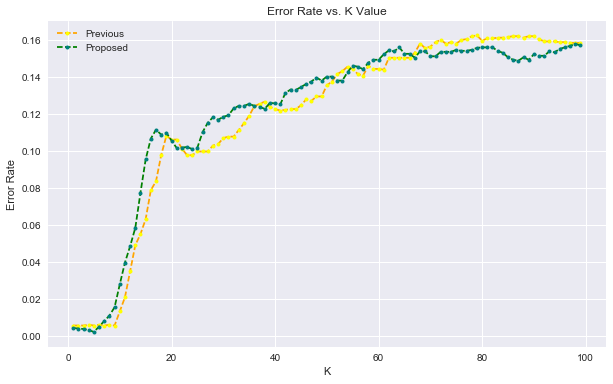

In [145]:
plt.figure(figsize=(10,6))

plt.plot(range(1,100),error_rate_org,color='orange', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=4,label='Previous')
plt.plot(range(1,100),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='teal', markersize=4,label='Proposed')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()